# Demostración Adaboost

Recordar que la idea es ver que el algoritmo de Adaboost se puede mostrar como un modelo aditivo...

**Por demostrar...** que el algoritmo Adaboost  es equivalente al forward stagewise modelo aditivo, siempre y cuando usemos la función de costos:
$L(y, f(x))=\exp (-y f(x))$

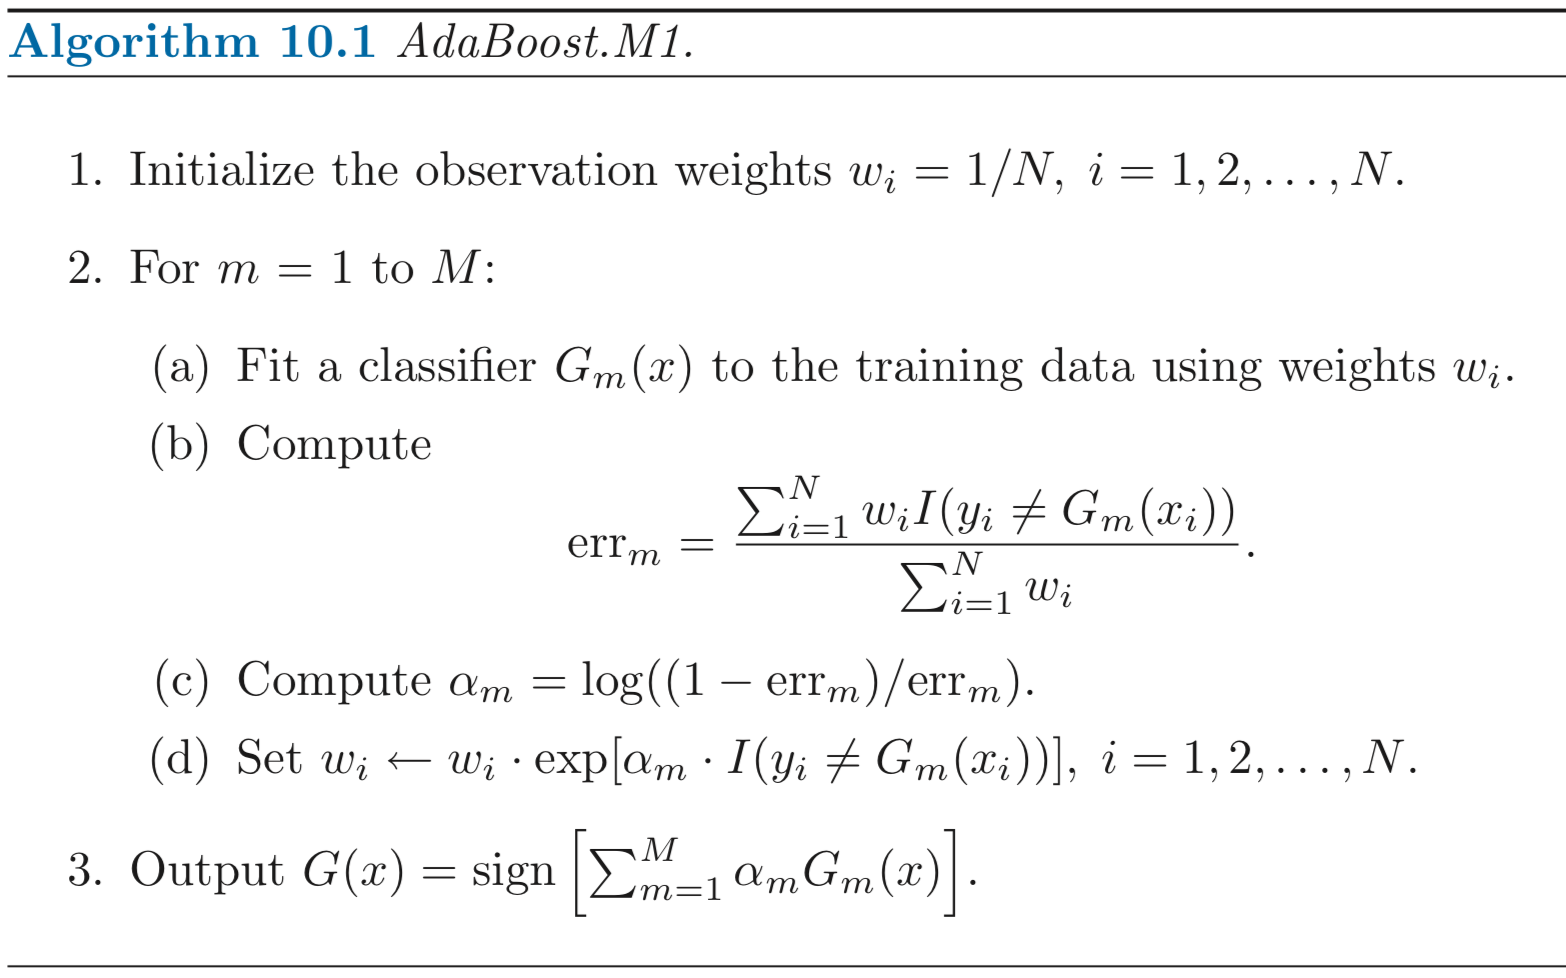

In [7]:
from PIL import Image
myImage1 = Image.open("Adab.png");
myImage2 = Image.open("FSTW102.png");
myImage1

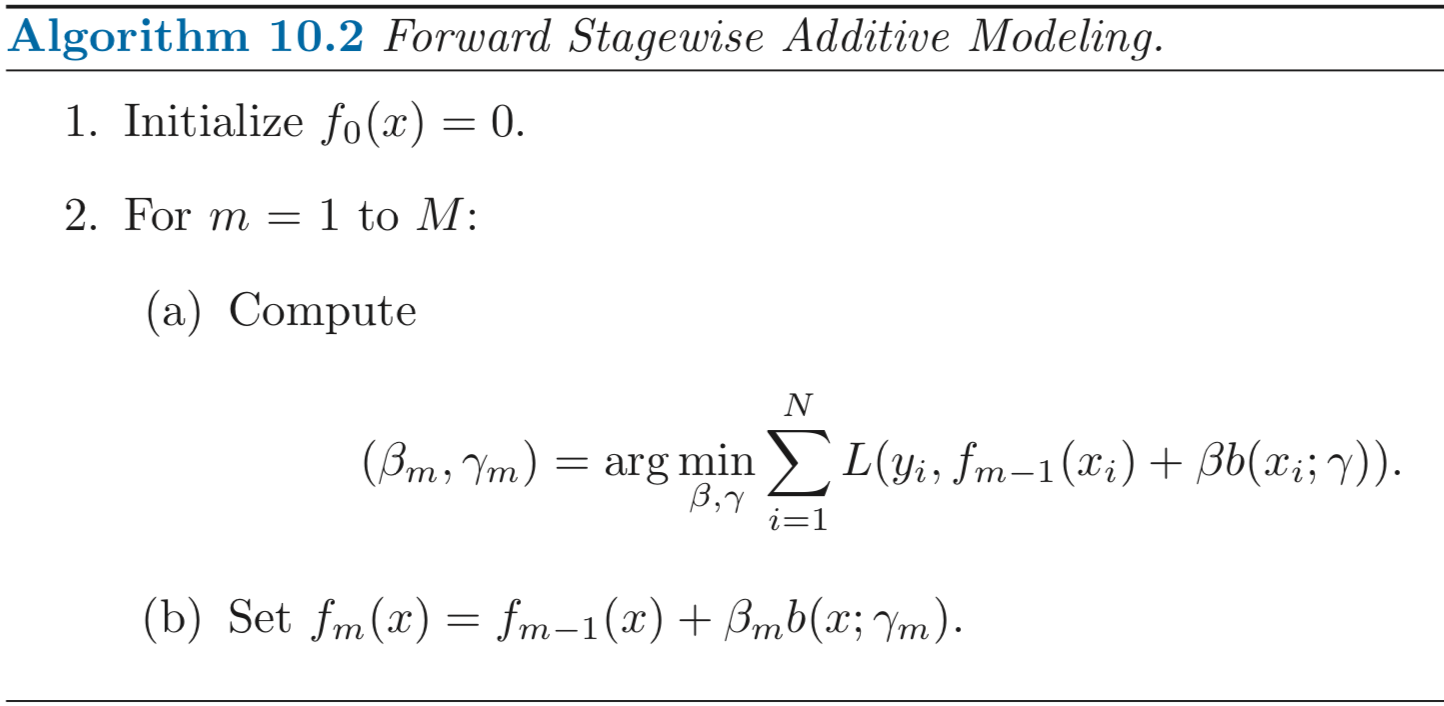

In [8]:
myImage2

Por tanto si sustituimos en el algorimo 10.2 tenemos que : 
$\left(\beta_{m}, \gamma_{m}\right)=\arg \min _{\beta, \gamma} \sum_{i=1}^{N} L\left(y_{i}, f_{m-1}\left(x_{i}\right)+\beta b\left(x_{i} ; \gamma\right)\right)=\left(\beta_{m}, G_{m}\right)=\arg \min _{\beta, G} \sum_{i=1}^{N} \exp \left[-y_{i}\left(f_{m-1}\left(x_{i}\right)+\beta G\left(x_{i}\right)\right)\right]$

**recordar que el algoritmo Adaboost las funciones base $b\left(x_{i} ; \gamma\right)$ son las $G_{m}(x) \in {-1,1}$, estos últimos los clasificadores individuales**

Entonces..(**Detalle**)

$\left(\beta_{m}, G_{m}\right)=\operatorname{argmin} \sum \exp \left[-y_{i}\left(f_{m-1}\left(x_{i}\right)+\beta G\left(x_{i}\right)\right)\right]$

$=\operatorname{argmin} \sum \exp \left[-y_{i}\left(f_{m-1}\left(x_{i}\right)\right)\right]\exp \left[-y_{i}\left(\beta G\left(x_{i}\right)\right)\right]$

$=\operatorname{argmin} \sum w_{i}^{(m)} \exp \left(-\beta y_{i} G\left(x_{i}\right)\right) \quad$ with $w_{i}^{(m)}=\exp \left(-y_{i} f_{m-1}\left(x_{i}\right)\right)$

con $w_{i}^{(m)}=\exp \left(-y_{i} f_{m-1}\left(x_{i}\right)\right)$ dado que cada $w_{i}^{(m)}$ no depende de  $\beta$ o $G(x),$ se puede considerar como un ponderador para cada observación. esta ponderación depende de $f_{m-1}\left(x_{i}\right),$ y estos valores se actualizanen cada paso o iteración $m$


aquí podemos ver que independientemente del valor de $\beta, G_{m}$ se debe cumplir que $G_{m}$ minimice la tasa de error.

$G_{m}=\arg \min _{G} \sum_{i=1}^{N} w_{i}^{(m)} I\left(y_{i} \neq G\left(x_{i}\right)\right)$

el cuál es el clasificador que minimiza la tasa de error ponderada en la predicción $y$ y esto se puede ver de forma más clara expresando $=\operatorname{argmin} \sum w_{i}^{(m)} \exp \left(-\beta y_{i} G\left(x_{i}\right)\right) \quad$ de la siguiente manera...

**Detalle**


dado que ya conocemos $G_{m}$  

$\begin{aligned}\left(\beta_{m}\right) &=\operatorname{argmin} \sum w_{i}^{(m)} \exp \left(-\beta y_{i} G_{m}\left(x_{i}\right)\right) \\ &=\operatorname{argmin} e^{-\beta} \cdot \sum_{y_{i}=G_{m}\left(x_{i}\right)} w_{i}^{(m)}+e^{\beta} \cdot \sum_{y_{i} \neq G_{m}\left(x_{i}\right)} w_{i}^{(m)} \end{aligned}$

$=e^{-\beta} \cdot \sum_{y_{i}=G\left(x_{i}\right)} w_{i}^{(m)}+e^{\beta} \cdot \sum_{y_{i} \neq G\left(x_{i}\right)} w_{i}^{(m)}+e^{-\beta} \cdot \sum_{y_{i} \neq G\left(x_{i}\right)} w_{i}^{(m)}-e^{-\beta} \cdot \sum_{y_{i} \neq G\left(x_{i}\right)} w_{i}^{(m)}$

$=\left(e^{\beta}-e^{-\beta}\right)\sum_{y_{i} \neq G\left(x_{i}\right)} w_{i}^{(m)}+e^{-\beta} \cdot (\sum_{y_{i}=G\left(x_{i}\right)} w_{i}^{(m)}+\sum_{y_{i} \neq G\left(x_{i}\right)} w_{i}^{(m)})$

$=\left(e^{\beta}-e^{-\beta}\right) \cdot \sum_{i=1}^{N} w_{i}^{(m)} I\left(y_{i} \neq G\left(x_{i}\right)\right)+e^{-\beta} \cdot \sum_{i=1}^{N} w_{i}^{(m)}$

Ahora obtenemos la solución para $\beta$..(**Detalle**)

Entonces sacamos la derivada de la última rxpresión y la igualamos a 0...

$\frac{\partial (\left(e^{\beta}-e^{-\beta}\right) \cdot \sum_{i=1}^{N} w_{i}^{(m)} I\left(y_{i} \neq G\left(x_{i}\right)\right)+e^{-\beta} \cdot \sum_{i=1}^{N} w_{i}^{(m)}) }{\partial \beta}=0$

$ \implies \left(e^{\beta}+e^{-\beta}\right) \cdot \sum w_{i}^{(m)} 1\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)-e^{-\beta} \cdot \sum w_{i}^{(m)}=0$

$ \implies \left(e^{\beta}+e^{-\beta}\right) \cdot \sum w_{i}^{(m)} 1\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)=e^{-\beta} \cdot \sum w_{i}^{(m)}$

$ \implies e^{\beta}\left(e^{\beta}+e^{-\beta}\right) \cdot \sum w_{i}^{(m)} 1\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)=\sum w_{i}^{(m)}$

$ \implies \left(e^{2\beta}+1\right) \cdot \sum w_{i}^{(m)} 1\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)=\sum w_{i}^{(m)}$

$ \implies \left(e^{2\beta}+1\right)= \frac{\sum w_{i}^{(m)}}{\sum w_{i}^{(m)} 1\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)}$

si hacemos la siguinte equivalencia con el adaboost ${err}_{m}=\frac{\sum w_{i}^{(m)} 1\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)}{\sum w_{i}^{(m)}}$

tenemos que 

$ \implies \left(e^{2\beta}+1\right)= \frac{1}{{err}_{m}} \implies \left(e^{2\beta}\right)= \frac{1}{{err}_{m}}-1=\frac{1-{err}_{m}}{{err}_{m}}$

$$
\implies \beta_{m}=\frac{1}{2} \log \frac{1-\operatorname{err}_{m}}{\operatorname{err}_{m}}
$$

se actualizan las aproximaciones..

$$
f_{m}(x)=f_{m-1}(x)+\beta_{m} G_{m}(x)
$$

y los pesos de la siguiente iteración son..

$$
w_{i}^{(m+1)}=w_{i}^{(m)} \cdot e^{-\beta_{m} y_{i} G_{m}\left(x_{i}\right)}
$$

sabiendo que $-y_{i} G_{m}\left(x_{i}\right)=2 \cdot I\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)-1$

entonces 

$$
w_{i}^{(m+1)}=w_{i}^{(m)} \cdot e^{\alpha_{m} I\left(y_{i} \neq G_{m}\left(x_{i}\right)\right)} \cdot e^{-\beta_{m}}
$$

notar que  $\alpha_{m}=2 \beta_{m}$ es equivalente a la línea $2 \mathrm{c}$ of AdaBoost.M1 (Algorithm 10.1 ). El factor $e^{-\beta_{m}}$ multiplica todos los pesos por el mismo valor, por tanto no afecta. Entonces la última expresión es equivalente a la línea $2(\mathrm{d})$ del algoritmo 10.1

**Por tanto los algorimos son equivalentes con $L(y, f(x))=\exp (-y f(x))$**